In [1]:
from os import listdir
from os.path import isfile, join
import re
import csv
import gensim
import numpy as np
from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors
from gensim.models.wrappers import FastText
import logging
import os
import pandas as pd 
import sys
import sklearn.metrics
import sklearn
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import random
import math
import warnings
import utils
from utils import *
from utils2 import *
import scipy.stats
from dataDictionariesLexicons import *
from testData import *
from polesConstructs import *
from nltk.corpus import wordnet as wn
random.seed(1)

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
# warnings.filterwarnings('ignore')

plt.rcParams['figure.dpi'] = 300

sys.path.insert(0, '../') # necessary in order to import word2vecTraining where the epoch saver class, which is part of the model, is located

# import nltk
# nltk.download()

## Load Wordnet Antonymn pairs

In [2]:
## Get a list of Antonym pairs from wordnet. Note that there will be reverse duplicates.
#able unable
#unable able

antonymPairs=[]
# for i in list(wn.all_synsets())[:10]:
for i in wn.all_synsets():    
    if i.pos() in ['a', 's']: # If synset is adj or satelite-adj.
        for j in i.lemmas(): # Iterating through lemmas for each synset.
            if j.antonyms(): # If adj has antonym.
                # Prints the adj-antonym pair.
                antonymPair = (j.name(), j.antonyms()[0].name())
                print(antonymPair)
                antonymPairs.append(antonymPair)
len(antonymPairs)                

('able', 'unable')
('unable', 'able')
('abaxial', 'adaxial')
('adaxial', 'abaxial')
('acroscopic', 'basiscopic')
('basiscopic', 'acroscopic')
('abducent', 'adducent')
('adducent', 'abducent')
('nascent', 'dying')
('dying', 'nascent')
('abridged', 'unabridged')
('unabridged', 'abridged')
('absolute', 'relative')
('relative', 'absolute')
('absorbent', 'nonabsorbent')
('nonabsorbent', 'absorbent')
('adsorbent', 'nonadsorbent')
('nonadsorbent', 'adsorbent')
('absorbable', 'adsorbable')
('adsorbable', 'absorbable')
('abstemious', 'gluttonous')
('gluttonous', 'abstemious')
('abstract', 'concrete')
('concrete', 'abstract')
('abundant', 'scarce')
('scarce', 'abundant')
('abused', 'unabused')
('unabused', 'abused')
('acceptable', 'unacceptable')
('unacceptable', 'acceptable')
('accessible', 'inaccessible')
('inaccessible', 'accessible')
('accommodating', 'unaccommodating')
('unaccommodating', 'accommodating')
('accurate', 'inaccurate')
('inaccurate', 'accurate')
('accustomed', 'unaccustomed')
(

('untangled', 'tangled')
('bound', 'unbound')
('unbound', 'bound')
('bordered', 'unbordered')
('unbordered', 'bordered')
('lotic', 'lentic')
('lentic', 'lotic')
('lower-class', 'middle-class')
('middle-class', 'upper-class')
('upper-class', 'lower-class')
('brachycephalic', 'dolichocephalic')
('dolichocephalic', 'brachycephalic')
('brave', 'cowardly')
('cowardly', 'brave')
('gutsy', 'gutless')
('gutless', 'gutsy')
('breast-fed', 'bottle-fed')
('bottle-fed', 'breast-fed')
('breathing', 'breathless')
('breathless', 'breathing')
('crystalline', 'noncrystalline')
('noncrystalline', 'crystalline')
('landed', 'landless')
('landless', 'landed')
('light', 'dark')
('dark', 'light')
('shaded', 'unshaded')
('unshaded', 'shaded')
('shaded', 'unshaded')
('unshaded', 'shaded')
('moonlit', 'moonless')
('moonless', 'moonlit')
('bridgeable', 'unbridgeable')
('unbridgeable', 'bridgeable')
('bright', 'dull')
('dull', 'bright')
('dimmed', 'undimmed')
('undimmed', 'dimmed')
('prejudiced', 'unprejudiced')
(

('deep', 'shallow')
('shallow', 'deep')
('de_facto', 'de_jure')
('de_jure', 'de_facto')
('defeasible', 'indefeasible')
('indefeasible', 'defeasible')
('defeated', 'undefeated')
('undefeated', 'defeated')
('defiant', 'compliant')
('compliant', 'defiant')
('defined', 'undefined')
('undefined', 'defined')
('well-defined', 'ill-defined')
('ill-defined', 'well-defined')
('derived', 'underived')
('underived', 'derived')
('inflected', 'uninflected')
('uninflected', 'inflected')
('inflected', 'uninflected')
('uninflected', 'inflected')
('definite', 'indefinite')
('indefinite', 'definite')
('dehiscent', 'indehiscent')
('indehiscent', 'dehiscent')
('dejected', 'elated')
('elated', 'dejected')
('delicate', 'rugged')
('rugged', 'delicate')
('breakable', 'unbreakable')
('unbreakable', 'breakable')
('demanding', 'undemanding')
('undemanding', 'demanding')
('imperative', 'beseeching')
('beseeching', 'imperative')
('democratic', 'undemocratic')
('undemocratic', 'democratic')
('arbitrary', 'nonarbitrar

('nonfat', 'fatty')
('fatal', 'nonfatal')
('nonfatal', 'fatal')
('curable', 'incurable')
('incurable', 'curable')
('fathomable', 'unfathomable')
('unfathomable', 'fathomable')
('favorable', 'unfavorable')
('unfavorable', 'favorable')
('favorable', 'unfavorable')
('unfavorable', 'favorable')
('feathered', 'unfeathered')
('unfeathered', 'feathered')
('felicitous', 'infelicitous')
('infelicitous', 'felicitous')
('fertile', 'sterile')
('sterile', 'fertile')
('finished', 'unfinished')
('unfinished', 'finished')
('finished', 'unfinished')
('unfinished', 'finished')
('finite', 'infinite')
('infinite', 'finite')
('finite', 'infinite')
('infinite', 'finite')
('opening', 'closing')
('closing', 'opening')
('first', 'last')
('last', 'first')
('intermediate', 'terminal')
('terminal', 'intermediate')
('first', 'second')
('second', 'first')
('fissile', 'nonfissile')
('nonfissile', 'fissile')
('fissionable', 'nonfissionable')
('nonfissionable', 'fissionable')
('fit', 'unfit')
('unfit', 'fit')
('fit', 

('indulgent', 'nonindulgent')
('nonindulgent', 'indulgent')
('industrial', 'nonindustrial')
('nonindustrial', 'industrial')
('infectious', 'noninfectious')
('noninfectious', 'infectious')
('infernal', 'supernal')
('supernal', 'infernal')
('informative', 'uninformative')
('uninformative', 'informative')
('gnostic', 'agnostic')
('agnostic', 'gnostic')
('informed', 'uninformed')
('uninformed', 'informed')
('ingenuous', 'disingenuous')
('disingenuous', 'ingenuous')
('inhabited', 'uninhabited')
('uninhabited', 'inhabited')
('inheritable', 'noninheritable')
('noninheritable', 'inheritable')
('inhibited', 'uninhibited')
('uninhibited', 'inhibited')
('injectable', 'uninjectable')
('uninjectable', 'injectable')
('injured', 'uninjured')
('uninjured', 'injured')
('innocent', 'guilty')
('guilty', 'innocent')
('inspiring', 'uninspiring')
('uninspiring', 'inspiring')
('instructive', 'uninstructive')
('uninstructive', 'instructive')
('edifying', 'unedifying')
('unedifying', 'edifying')
('enlightening

('continental', 'intercontinental')
('intercontinental', 'continental')
('national', 'international')
('international', 'national')
('interstate', 'intrastate')
('intrastate', 'interstate')
('natural', 'unnatural')
('unnatural', 'natural')
('natural', 'artificial')
('artificial', 'natural')
('natural', 'supernatural')
('supernatural', 'natural')
('natural', 'sharp')
('sharp', 'flat')
('flat', 'natural')
('ultimate', 'proximate')
('proximate', 'ultimate')
('necessary', 'unnecessary')
('unnecessary', 'necessary')
('net', 'gross')
('gross', 'net')
('neurotic', 'unneurotic')
('unneurotic', 'neurotic')
('nice', 'nasty')
('nasty', 'nice')
('nidicolous', 'nidifugous')
('nidifugous', 'nidicolous')
('noble', 'ignoble')
('ignoble', 'noble')
('noble', 'lowborn')
('lowborn', 'noble')
('normal', 'abnormal')
('abnormal', 'normal')
('normal', 'abnormal')
('abnormal', 'normal')
('hypertensive', 'hypotensive')
('hypotensive', 'normotensive')
('normotensive', 'hypertensive')
('normal', 'paranormal')
('p

('improper', 'proper')
('prophetic', 'unprophetic')
('unprophetic', 'prophetic')
('prospective', 'retrospective')
('retrospective', 'prospective')
('protected', 'unprotected')
('unprotected', 'protected')
('protective', 'unprotective')
('unprotective', 'protective')
('proud', 'humble')
('humble', 'proud')
('proved', 'unproved')
('unproved', 'proved')
('provident', 'improvident')
('improvident', 'provident')
('provocative', 'unprovocative')
('unprovocative', 'provocative')
('prudent', 'imprudent')
('imprudent', 'prudent')
('punctual', 'unpunctual')
('unpunctual', 'punctual')
('punished', 'unpunished')
('unpunished', 'punished')
('punitive', 'rehabilitative')
('rehabilitative', 'punitive')
('purebred', 'crossbred')
('crossbred', 'purebred')
('pure', 'impure')
('impure', 'pure')
('pure', 'impure')
('impure', 'pure')
('contaminated', 'uncontaminated')
('uncontaminated', 'contaminated')
('purposeful', 'purposeless')
('purposeless', 'purposeful')
('qualified', 'unqualified')
('unqualified', 

('nourished', 'malnourished')
('malnourished', 'nourished')
('steady', 'unsteady')
('unsteady', 'steady')
('stemmed', 'stemless')
('stemless', 'stemmed')
('stimulating', 'unstimulating')
('unstimulating', 'stimulating')
('depressant', 'stimulative')
('stimulative', 'depressant')
('stomatous', 'astomatous')
('astomatous', 'stomatous')
('straight', 'crooked')
('crooked', 'straight')
('straight', 'curved')
('curved', 'straight')
('coiled', 'uncoiled')
('uncoiled', 'coiled')
('straight', 'crooked')
('crooked', 'straight')
('stressed', 'unstressed')
('unstressed', 'stressed')
('tonic', 'atonic')
('atonic', 'tonic')
('strong', 'weak')
('weak', 'strong')
('stubborn', 'docile')
('docile', 'stubborn')
('subordinate', 'insubordinate')
('insubordinate', 'subordinate')
('successful', 'unsuccessful')
('unsuccessful', 'successful')
('sufficient', 'insufficient')
('insufficient', 'sufficient')
('sugary', 'sugarless')
('sugarless', 'sugary')
('superior', 'inferior')
('inferior', 'superior')
('superior

('rh-positive', 'rh-negative')
('rh-negative', 'rh-positive')
('categorematic', 'syncategorematic')
('syncategorematic', 'categorematic')
('idiographic', 'nomothetic')
('nomothetic', 'idiographic')
('pro-choice', 'pro-life')
('pro-life', 'pro-choice')
('baptized', 'unbaptized')
('unbaptized', 'baptized')
('benign', 'malignant')
('malignant', 'benign')
('calcicolous', 'calcifugous')
('calcifugous', 'calcicolous')
('invertible', 'non-invertible')
('non-invertible', 'invertible')
('immunocompetent', 'immunodeficient')
('immunodeficient', 'immunocompetent')
('allogeneic', 'xenogeneic')
('xenogeneic', 'allogeneic')
('long-spurred', 'short-spurred')
('short-spurred', 'long-spurred')
('shelled', 'unshelled')
('unshelled', 'shelled')
('jawed', 'jawless')
('jawless', 'jawed')
('skinned', 'skinless')
('skinless', 'skinned')
('flowering', 'flowerless')
('flowerless', 'flowering')
('abient', 'adient')
('adient', 'abient')
('alphabetic', 'analphabetic')
('analphabetic', 'alphabetic')
('anodic', 'ca

3872

In [3]:
# import json
# with open('./listOfWords/wordNet3872AntonymPairs', 'w') as fp:
#     json.dump(antonymPairs, fp)

In [4]:
# with open('./listOfWords/wordNet3872AntonymPairs') as fp:
#     antonymPairs = json.load(fp)

In [8]:
print(len(antonymPairs))
antonymPairs

3872


[('able', 'unable'),
 ('unable', 'able'),
 ('abaxial', 'adaxial'),
 ('adaxial', 'abaxial'),
 ('acroscopic', 'basiscopic'),
 ('basiscopic', 'acroscopic'),
 ('abducent', 'adducent'),
 ('adducent', 'abducent'),
 ('nascent', 'dying'),
 ('dying', 'nascent'),
 ('abridged', 'unabridged'),
 ('unabridged', 'abridged'),
 ('absolute', 'relative'),
 ('relative', 'absolute'),
 ('absorbent', 'nonabsorbent'),
 ('nonabsorbent', 'absorbent'),
 ('adsorbent', 'nonadsorbent'),
 ('nonadsorbent', 'adsorbent'),
 ('absorbable', 'adsorbable'),
 ('adsorbable', 'absorbable'),
 ('abstemious', 'gluttonous'),
 ('gluttonous', 'abstemious'),
 ('abstract', 'concrete'),
 ('concrete', 'abstract'),
 ('abundant', 'scarce'),
 ('scarce', 'abundant'),
 ('abused', 'unabused'),
 ('unabused', 'abused'),
 ('acceptable', 'unacceptable'),
 ('unacceptable', 'acceptable'),
 ('accessible', 'inaccessible'),
 ('inaccessible', 'accessible'),
 ('accommodating', 'unaccommodating'),
 ('unaccommodating', 'accommodating'),
 ('accurate', 'ina

In [6]:
#optional, remove reverse duplicates
# antonymPairsFiltered=[]
# previousAntonymPair=('','')
# for antonymPair in antonymPairs:
#     if antonymPair[0]==previousAntonymPair[1] and antonymPair[1]==previousAntonymPair[0]:
#         pass
#     else:
#         antonymPairsFiltered.append(antonymPair)
#         previousAntonymPair=antonymPair
    
# antonymPairs = antonymPairsFiltered    
# len(antonymPairs)    

## Load models

In [7]:
modelsPath = os.path.normpath(r'D:\data\wordVectors') 
# modelFilePath = os.path.join(modelsPath, 'GoogleNews-vectors-negative300.bin')
# model2 = KeyedVectors.load_word2vec_format(modelFilePath,binary=True) 
modelFilePath = os.path.join(modelsPath, 'GoogleNews-vectors-negative300LowerCase.bin')
model1 = KeyedVectors.load(modelFilePath) 

In [8]:
modelsPath = os.path.normpath(r'D:\data\wordVectors') 
modelFilePath = os.path.join(modelsPath, 'glove.6B.300d.txt.word2vec.bin')
model2 = KeyedVectors.load_word2vec_format(modelFilePath,binary=True) 

In [9]:
modelsPath = os.path.normpath(r'D:\data\wordVectors') 
modelFilePath = os.path.join(modelsPath, 'glove.twitter.27B.200d.txt.word2vec.bin')
model3 = KeyedVectors.load(modelFilePath) 

In [10]:
modelsPath = os.path.normpath(r'D:\data\wordVectors') 
modelFilePath = os.path.join(modelsPath, 'glove.42B.300d.txt.word2vec.bin')
model4 = KeyedVectors.load(modelFilePath) 

In [11]:
modelsPath = os.path.normpath(r'D:\data\wordVectors') 
modelFilePath = os.path.join(modelsPath, 'glove.840B.300d.txt.word2vec.bin')
model5 = KeyedVectors.load(modelFilePath) 

In [12]:
modelsPath = os.path.normpath(r'D:\data\wordVectors') 
modelFilePath = os.path.join(modelsPath, 'fastext-common-crawl-300d-2M-subword.bin')
model6 = KeyedVectors.load(modelFilePath)

In [13]:
modelsPath = os.path.normpath(r'D:\data\wordVectors') 
modelFilePath = os.path.join(modelsPath, 'fastext-wiki-news-300d-1M-subword-Original.bin')
model7 = KeyedVectors.load(modelFilePath)

In [92]:
models = [model1,model2,model3,model4,model5,model6,model7]
modelsNames = ['word2vec trained on Google News','Glove trained on Wikipedia', 'Glove trained on Twitter',
              'Glove trained on Common Crawl (small)','Glove trained on Common Crawl (large)',
               'FastText trained on Common Crawl',
              'FastText trained on Wikipedia+UMBC+statmt.org news']

# key='1-1'#males to females
# key='1-4'#masculinity to femininity
# key='2-1'#popular given names among whites and African-Americans
# key='2-2'#popular given names among whites and African-Americans
# key='4-1'#religiosity to lack of religiosity
# key='4-2'#Christians the Muslims
# key='5-1'#senior citizens to young people
# key='6-1'#middle and working class to upper class
key='7-1'#plain looking and physical attractiveness
# key='8-1'#conservatives to liberals

dataDictKeys = len(models)*[key]

if key=='1-1':
    poleNames = len(models)*[('Males\nPole','Females\nPole')] #1-1
    AxisNames = len(models)*['Males to Females Axis']
elif key=='1-4':
    poleNames = len(models)*[('Masculinity\nPole','Femininity\nPole')] #1-4
    AxisNames = len(models)*['Masculinity to Femininity Axis']
elif key=='2-1':    
    poleNames = len(models)*[('Whites\nPole','African-Americans\nPole')] #2-1
    AxisNames = len(models)*['Whites to African-Americans Axis']
elif key=='2-2':    
    poleNames = len(models)*[('Popular Whites\nnames Pole','Popular African-Americans\nnames Pole')] #2-2
    AxisNames = len(models)*['Popular Whites names to popular African-American names Axis']
elif key=='4-1':    
    poleNames = len(models)*[('Religiosity\nPole','non-religiosity\nPole')] #4-1
    AxisNames = len(models)*['Religiosity to non-religiosity Axis']
elif key=='4-2':    
    poleNames = len(models)*[('Christians\nPole','Muslims\nPole')] #4-2
    AxisNames = len(models)*['Christians to Muslims Axis']
elif key=='5-1':    
    poleNames = len(models)*[('Senior citizens\nPole','Young people\nPole')] #5-1
    AxisNames = len(models)*['senior citizens to young people Axis']
elif key=='6-1':    
    poleNames = len(models)*[('Middle and working\nclass Pole','Upper-class\nPole')] #6-1
    AxisNames = len(models)*['Middle and working class to upper-class Axis']
elif key=='7-1':    
    poleNames = len(models)*[('Plain looking\nPole','Physical attractiveness\nPole')] #7-1
    AxisNames = len(models)*['Plain looking to physical attractiveness Axis']
elif key=='8-1':    
    poleNames = len(models)*[('Conservative\nPole','Liberal\nPole')] #8-1
    AxisNames = len(models)*['Conservative to Liberal Axis']
else:
    print("no valid key specified")

dataSetIndexes = [
# '0-1', #percentage females per occupation
# '0-2', #country's GDP per capita
# '0-3', #car brands and prices
# '0-4', #voting behavior by ethnic/racial group
# '0-5', #voting behavior by profession
    
'1-1', #gender
'1-2',
'1-3',
'1-4',
'1-5',
    
'2-1', #Race/ethnicity
'2-2',
'2-3',
'2-4',    
  
'3-1', #Sexual orientation  
    
'4-1', #religiosity    
'4-2', #religion Islam and Christianity
    
'5-1', #age 
'6-1', #socioeconomic status
'7-1', #physical beauty
    
'8-1', #Personal ideology
'8-2', #Party affiliation and political parties
'8-3', #US presidents
'8-4', #Ideologies abstract
'8-5', #influential conservatives and liberals
]

dataSetIndexes = [key]

## Align antonyms pairs axes and and cultural axes

In [93]:
closestAntonymAxesForAllModels = []

for modelIndex, model in enumerate(models):
    closestAntonymAxes = {}
    for rowNumber, dataSetIndex in enumerate(dataSetIndexes):
        constructPole1 = dataDict[dataSetIndex]['constructPole1']
        constructPole2 = dataDict[dataSetIndex]['constructPole2']

        if modelIndex>=1: #Glove and fastext vocabulary uses - instead of _ So we need to alter Construct poles and real data - Checked!
            RealDataTemp={} # we don't need this in this script
            constructPole1,constructPole2,RealDataTemp=replaceUnderscoreForDash(constructPole1,constructPole2,RealDataTemp)

        if modelIndex in [1,2,3]: # Lowercase poles for models With only lowercase vocabularies - Checked!
            constructPole1 = list(set(list(map(str.lower,constructPole1))))
            constructPole2 = list(set(list(map(str.lower,constructPole2))))

        constructPole1,constructPole2 = constructsFilter(model,constructPole1,constructPole2,printFlag=False)# Filter out terms not in model vocabulary
        constructAxis = dimensionN(model, constructPole1,constructPole2)  

        axesSimilarities=[]
        for antonymPair in antonymPairs:
            if antonymPair[0] in model and antonymPair[1] in model:
                antonymPairAxis = dimensionN(model, [antonymPair[0]],[antonymPair[1]])  
                try:
                    cs=sklearn.metrics.pairwise.cosine_similarity(antonymPairAxis.reshape(1,-1), constructAxis.reshape(1,-1))[0][0]
                except:
                    cs=0
                axesSimilarities.append((antonymPair[0],antonymPair[1],cs))
            else:
                continue

        axesSimilaritiesSorted = sorted(set(axesSimilarities), key=lambda tup: tup[2],reverse=True)
        closestAntonymAxes[dataSetIndex]=axesSimilaritiesSorted
    closestAntonymAxesForAllModels.append(closestAntonymAxes)
# closestAntonymAxes['1-1'][1400:1500]
# closestAntonymAxes['1-1']    

## Writing results to an Excel file

In [94]:
import xlwt

book = xlwt.Workbook(encoding="utf-8")

sheet1 = book.add_sheet("Sheet 1")
#print output matrix
numberOfRowsToDisplay=30
columnIndex=0
for modelIndex, model in enumerate(models):
    axisSimilaritiesSorted = closestAntonymAxesForAllModels[modelIndex][key]
    for rowIndex, triplet in enumerate(axisSimilaritiesSorted[:numberOfRowsToDisplay]):
#         string=triplet[0]+'–'+triplet[1]
#         sheet1.write(rowIndex, columnIndex,string)
#         sheet1.write(rowIndex, columnIndex+1, str(triplet[2]))
        string=f'{triplet[0]}–{triplet[1]} ({str(round(triplet[2],2))})'
        sheet1.write(rowIndex, columnIndex,string)
#     columnIndex+=3
    columnIndex+=1

fileName = dataDict[key]['name']
book.save(f'../../tables/{key}-{fileName}.xls')    

In [96]:
def PlotDimensionH(ax,df, dim,constructPole1,constructPole2,fontSize=35,pole1Name=None,pole2Name=None,title="Axis"):
    ax.set_frame_on(False)
    ax.set_title(title, fontsize = 20,  y=25)
    colors = Coloring(df[dim])
    colors2={'1':'blue','-1':'red'}
    dfSorted=df['Axis'].sort_values()
    for i, word in enumerate(dfSorted.index):
        
        if i%2==0:
#         r=random.randint(1,50)*0.1
#         if checkNearBy(df[dim][i],list(dfSorted.values)[:i],0.01):
#             r=random.randint(5,12)
            lengthWord=len(word)
            ax.annotate(word, xy=(dfSorted[i],0),xytext=(dfSorted[i],lengthWord*1.85), color = colors2[str(dataDict[dataDictKey]['RealDataLexicons'][0][word])], alpha = 1, fontsize = fontSize, rotation=60)
        else:
            ax.annotate(word, xy=(dfSorted[i],0),xytext=(dfSorted[i],-2), color = colors2[str(dataDict[dataDictKey]['RealDataLexicons'][0][word])], alpha = 1, fontsize = fontSize, rotation=60)
            
    MaxY = dfSorted.max()
    MinY = dfSorted.min()
    
    bbox_props = dict(boxstyle="square", fc="grey", ec="grey",alpha=0.5, lw=0)
    if pole1Name==None:
        pole1Text = constructPole1[0]#'\n'.join(constructPole1)
    else:
        pole1Text = pole1Name
    #pole1Text = '\n'.join(constructPole1)
    ax.annotate(pole1Text, xy=(MinY,0),xytext=(MinY,2), color = "black", alpha = 1, fontsize = 20, rotation=0,bbox=bbox_props)
    bbox_props = dict(boxstyle="square", fc="grey", ec="grey", alpha=0.5,lw=0)
    if pole2Name==None:
        pole2Text = constructPole2[0]#'\n'.join(constructPole1)
    else:
        pole2Text = pole2Name
    ax.annotate(pole2Text, xy=(MaxY,1),xytext=(MaxY,2), color = "black", alpha = 1, fontsize = 20, rotation=0,bbox=bbox_props)    
    
#     ax.annotate('test1, test2, test3')
    plt.xlim(MinY,MaxY)
    plt.axhline(0, color='black')
    plt.yticks(())
    plt.xticks(())

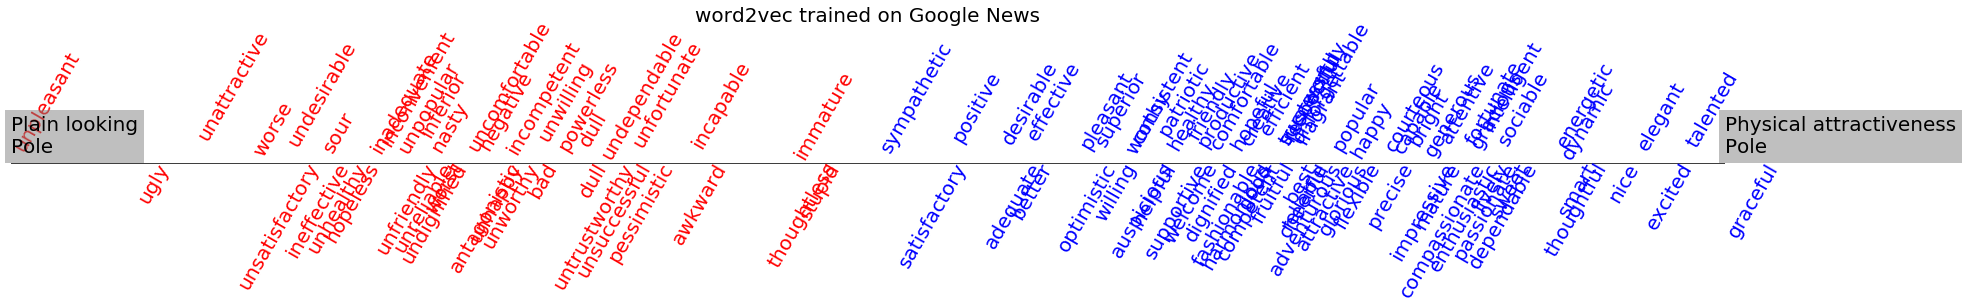

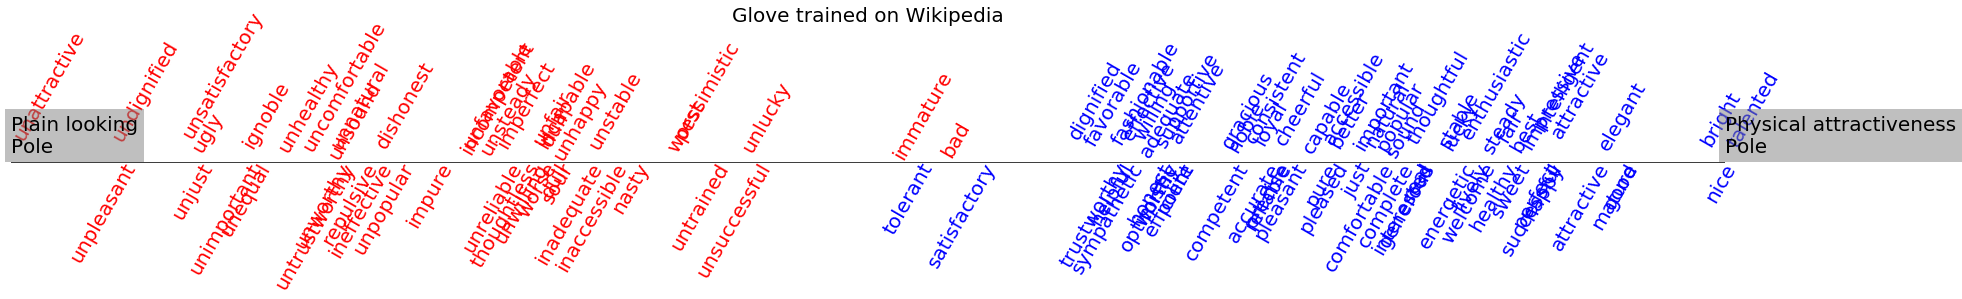

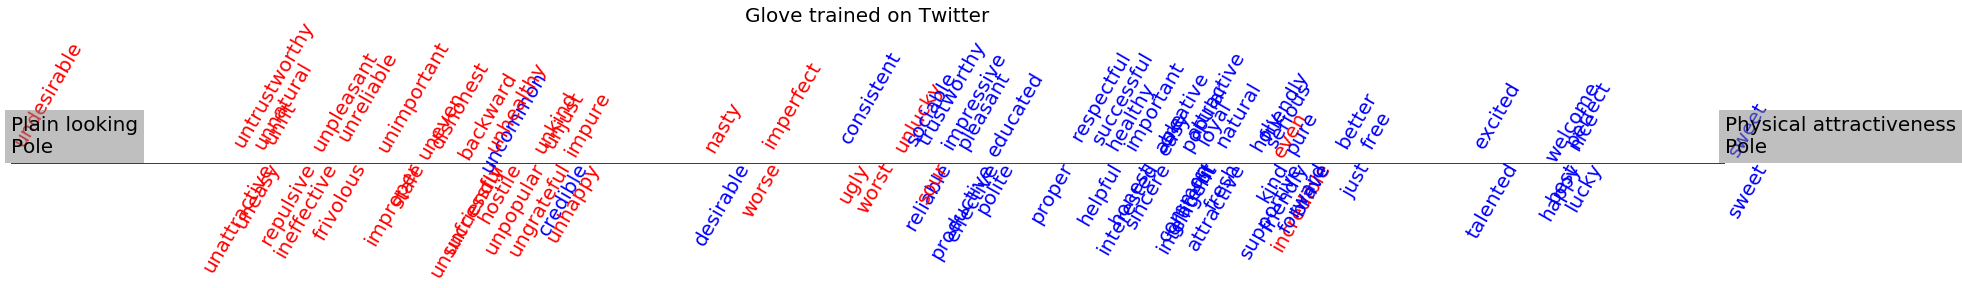

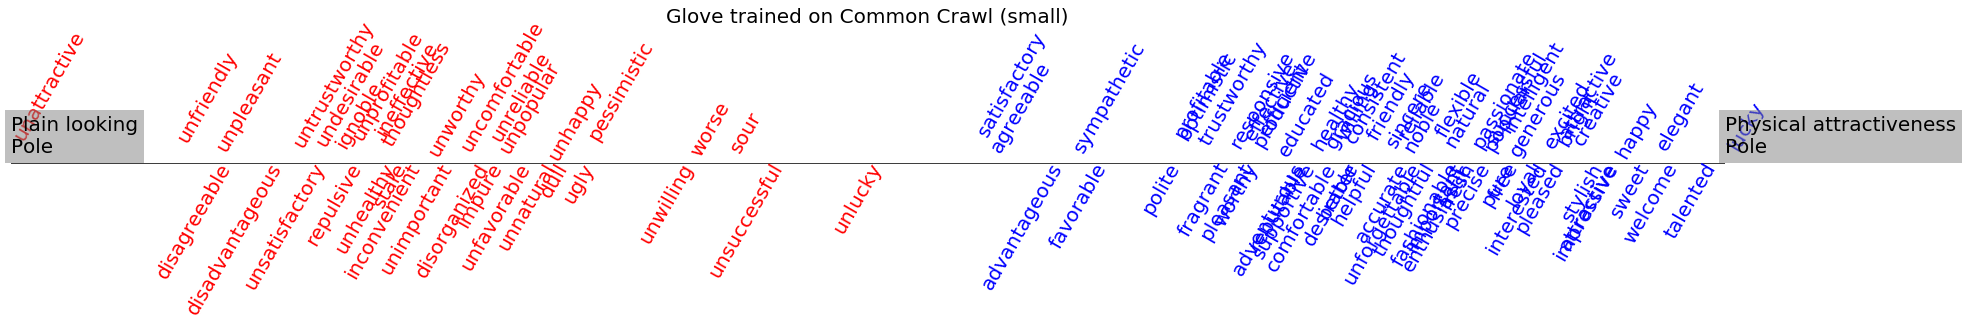

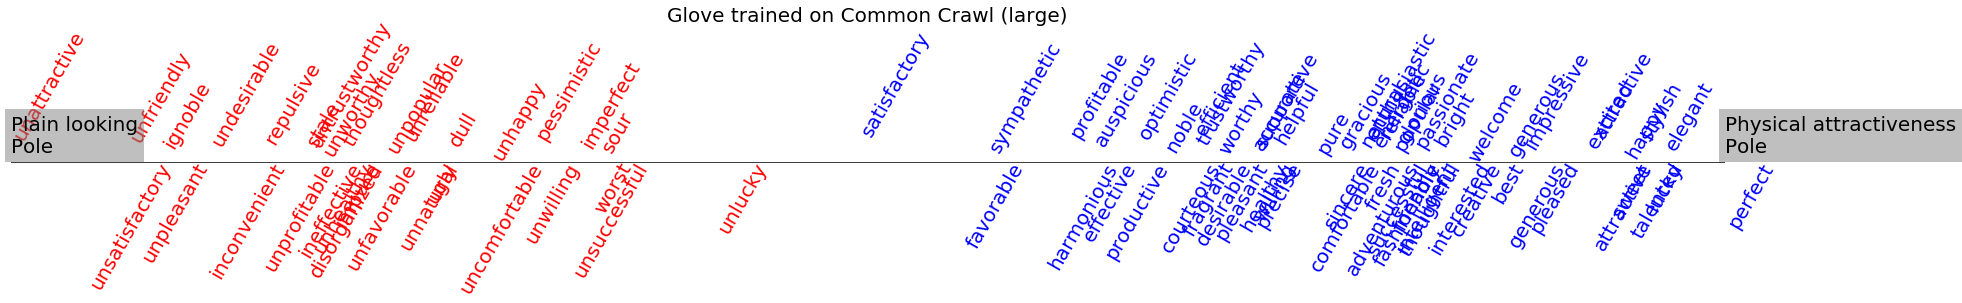

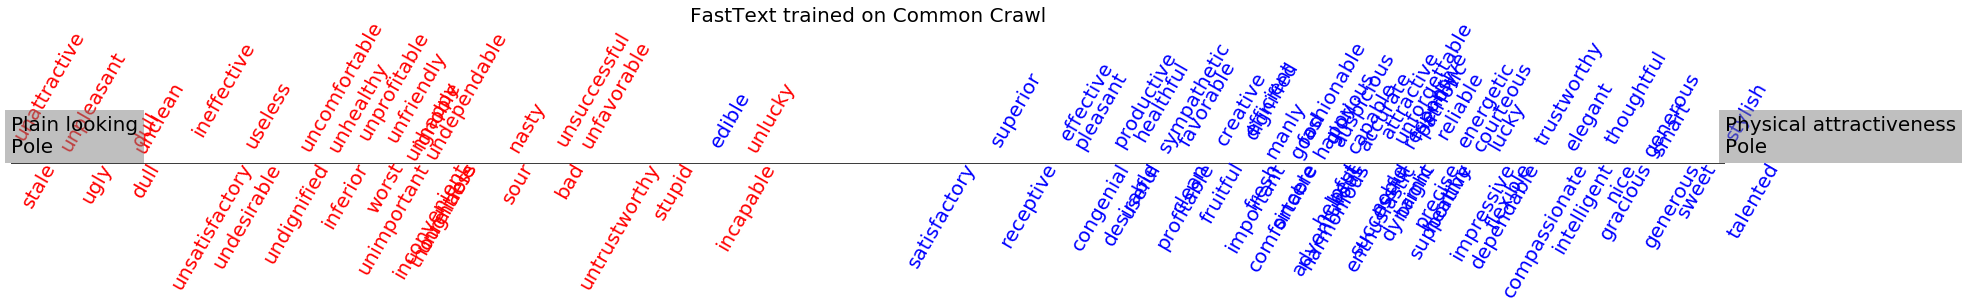

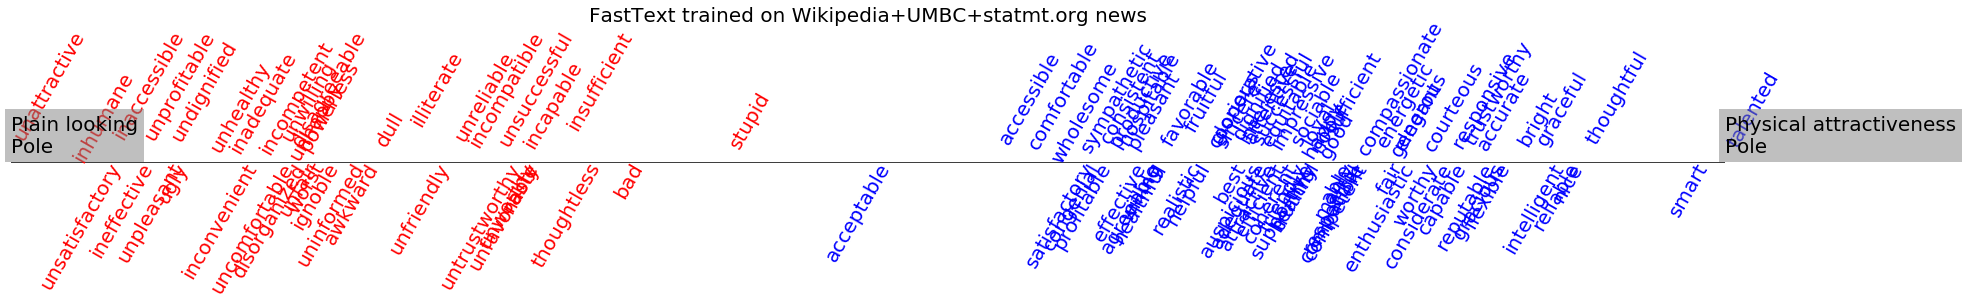

In [97]:
dataFrames = {}

for keyIndex, dataDictKey in enumerate(dataDictKeys):
    model=models[keyIndex]
    name = dataDict[dataDictKey]['name']
    constructPole1 = dataDict[dataDictKey]['constructPole1']
    constructPole2 = dataDict[dataDictKey]['constructPole2']
    if keyIndex>=1: #Glove and fastext vocabulary uses - instead of _ So we need to alter Construct poles and real data - Checked!
        constructPole1,constructPole2,RealDataTemp=replaceUnderscoreForDash(constructPole1,constructPole2,RealDataTemp)
    
    if keyIndex in [1,2,3]: # Lowercase poles for models With only lowercase vocabularies - Checked!
        constructPole1 = list(set(list(map(str.lower,constructPole1))))
        constructPole2 = list(set(list(map(str.lower,constructPole2))))
    else:
        constructPole1 = list(map(str.lower,constructPole1))
        constructPole2 = list(map(str.lower,constructPole2))
    
    words=[]
#     wordsToExclude = ['rich', 'cut'] #6-1    
#     wordsToExclude = ['progressive'] #8-1
    for wordTuple in closestAntonymAxesForAllModels[keyIndex][key][:100]:
        if wordTuple[0] in model and wordTuple[0] in dataDict[dataDictKey]['RealDataLexicons'][0] and wordTuple[0] not in wordsToExclude: #HGI:
#         if wordTuple[0] in model and wordTuple[0] !='progressive': 
            words.append(wordTuple[0])
        if wordTuple[1] in model and wordTuple[1] in dataDict[dataDictKey]['RealDataLexicons'][0] and wordTuple[1] not in wordsToExclude: #HGI:
#         if wordTuple[1] in model and wordTuple[1] !='progressive': 
            words.append(wordTuple[1])    
            
    constructPole1,constructPole2 = constructsFilter(model,constructPole1,constructPole2,printFlag=False)# Filter out terms not in model vocabulary

#     RealData = realDataFilter(model,RealDataTemp,0)#Filter out terms not in model vocabulary (Last parameter Flag prints out OOV words)

    Axis = dimensionN(model, constructPole1,constructPole2)  
    AxisName='Axis'
    try:
#         dataFrame = makeDF(model, RealData.keys(),Axis,AxisName)
        dataFrame = makeDF(model, words,Axis,AxisName)
    except:
        pass
#     dataFrame['RealValues']=RealData.values()
    dataFrame['AxisInRadians']=[math.acos(value) for value in dataFrame['Axis'].tolist()]# Transform cosine  similarities into angle radians (interval variable)
    dataFrame['Name']=dataFrame.index ###   index column into its own name column
    fig = plt.figure(figsize = (215,0.1))
    ax1 = fig.add_subplot(161)

    PlotDimensionH(ax1, dataFrame, AxisName,constructPole1,constructPole2,fontSize=20,pole1Name=poleNames[keyIndex][0],pole2Name=poleNames[keyIndex][1],title=modelsNames[keyIndex])        
#     plt.subplots_adjust(bottom=0.1)
#     plt.tight_layout(pad=0.5)
    plt.savefig(f'../../paper/figures/extras/{key}Model{keyIndex}.png',dpi=300,bbox_inches='tight',pad_inches=0.5)

In [98]:
import numpy as np
from PIL import Image
import PIL
imgs = [Image.open(f'../../paper/figures/extras/{key}Model{x}.png') for x in range(7)]
# pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
imgs_comb = np.vstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )
imgs_comb = PIL.Image.fromarray( imgs_comb)
fileName = dataDict[key]['name']
imgs_comb.save( f'../../paper/figures/extras/{fileName}{key}.png' )